# AIM:
## Plot Specific Heat of Solids w.r.t. Temperature:
### (a) Dulong-Petit Law
### (b) Einstein Distribution Function
### (c) Debye Distribution Function

## Step-1 : Import necessary libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Step-2 : Define required constants

In [10]:
k = 1.38e-23 #Boltzmann Constant
N = 6.022e+23 #Avagadro Number

## Step-3 : Take required Inputs from the User

In [11]:
name = input("Enter the name of the Solid : ")
Te = float(input("Enter the value of Einstein Temperature in Kelvin : "))
Td = float(input("Enter the value of Debye Temperature in Kelvin : "))

Enter the name of the Solid : Cu
Enter the value of Einstein Temperature in Kelvin : 100
Enter the value of Debye Temperature in Kelvin : 100


## Step-4 : Define Temperature range

In [12]:
T = np.arange(1,2*Td) #Temperature Range in Kelvin

## Step-5 : Using for loop, define lists (for all models) for Cv at different temperatures

![Formulas](https://i.postimg.cc/cHNbLPgt/Dp-E-D-Laws.png)

In [22]:
Cvdp = np.full(len(T),3*N*k) #Duolong-Petit Law

Cve = 3*N*k*((Te/T)**2)*np.exp(Te/T)/((np.exp(Te/T)-1)**2) #Einstein Law

Cvd = [] #Creating Empty list for Cv values obtained by Debye Theory
for i in range(len(T)):
    fn = lambda y: y**4 * np.exp(y) / (np.exp(y) - 1)**2
    Cvdl = quad(fn,0,Td/T[i])[0]
    Cvdl = Cvdl*9*N*k*((T[i]/Td)**3)
    Cvd.append(Cvdl) #Debye Law

## Step-6 : Plotting various models

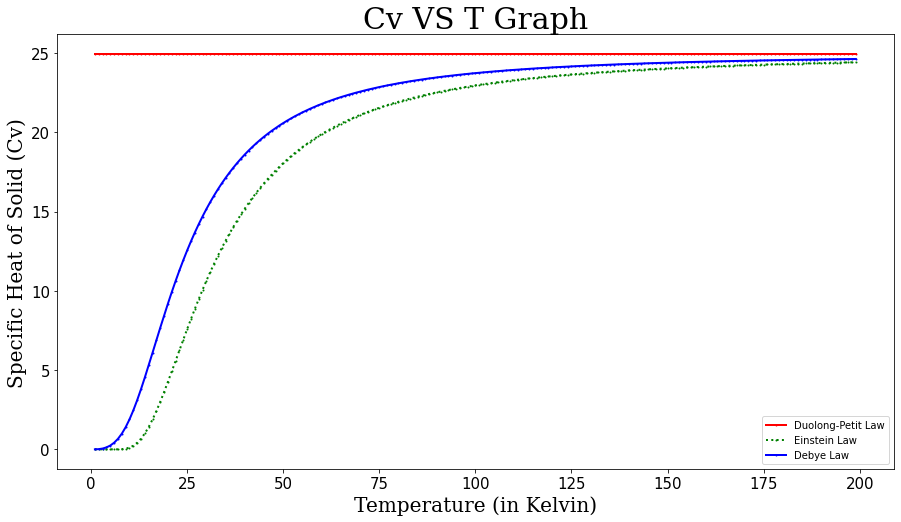

In [23]:
plt.figure(figsize=(15,8)) #Setting size of the figure
fontji = {'family':'serif','size':20}
fontji2 = {'family':'serif','size':30}

plt.plot(T,Cvdp,"o-r",lw="2",ms="1",label="Duolong-Petit Law")
plt.plot(T,Cve,"o:g",lw="2",ms="1",label="Einstein Law")
plt.plot(T,Cvd,"o-b",lw="2",ms="1",label="Debye Law")
plt.legend(loc="best")
plt.xlabel("Temperature (in Kelvin)",fontdict=fontji)
plt.ylabel("Specific Heat of Solid (Cv)",fontdict=fontji)
plt.title("Cv VS T Graph",fontdict=fontji2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()